In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('Market_Basket_Optimisation.csv')

<Axes: title={'center': 'Relative Frequency'}>

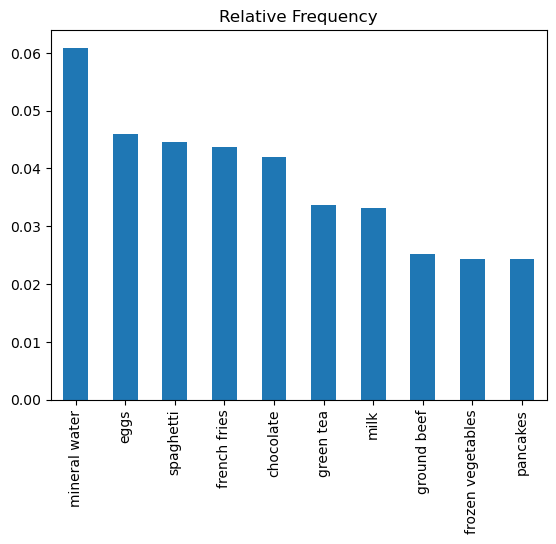

In [4]:
data.stack().value_counts(normalize=True)[:10].plot(kind='bar',title='Relative Frequency')

<Axes: title={'center': 'Frequency'}>

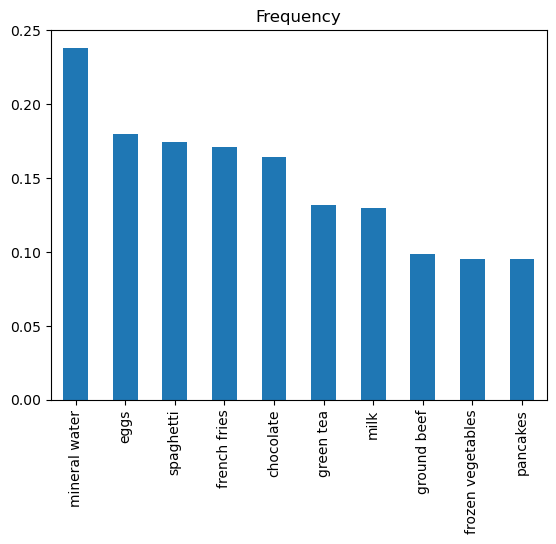

In [5]:
data.stack().value_counts().apply(lambda item:item/data.shape[0])[:10].plot(kind='bar',title='Frequency')

In [6]:
transaction=[]
for i in range(data.shape[0]):
    row=data.iloc[i].dropna().tolist()
    transaction.append(row)

In [16]:
transaction[:10]

[['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food']]

In [18]:
from apyori import apriori
rules=apriori(transactions=transaction,
              min_support=0.004,
              min_length=2,
              max_length=0)

results=list(rules)

In [25]:
def inspect(results):
    item_Sets=[]
    supports=[]
    for result in results:
        
            item_Sets.append(tuple(result[0]))
            supports.append(result[1])

    return list(zip(item_Sets,supports))

results_data=pd.DataFrame(inspect(results),
                          columns=['Item set','support'])

In [32]:
pd.set_option('display.max_rows',data.shape[0])
results_data.sort_values('support',ascending=False)[:500]

,Item set,support
69,"(mineral water,)",0.238267
34,"(eggs,)",0.179733
96,"(spaghetti,)",0.174133
40,"(french fries,)",0.170933
23,"(chocolate,)",0.163867
51,"(green tea,)",0.132000
68,"(milk,)",0.129600
52,"(ground beef,)",0.098267
46,"(frozen vegetables,)",0.095333
78,"(pancakes,)",0.095067
